### Visualizing Predictions

In [107]:
import requests
import json
import numpy as np
import pandas as pd
from pprint import pprint
from scipy.stats import sem
from statistics import mean, stdev
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
from utils import *
%matplotlib inline
colors = ['royalblue', 'seagreen', 'coral', 'darkorchid', 'gray', 'gold']
hatches = ['//', '||', '--', 'xx', 'oo', r'\\']

/home/jknofczy/miniconda3/envs/arise/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jknofczy/miniconda3/envs/arise/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [5]:
""" File/dictionary serialization using JSON. """
def j_save(d, filename):
    """ Serialize a dictionary or list d. """
    with open(f'{filename}', 'wb') as f:
        json.dump(d, f, indent=2)

def j_load(filename):
    """ Load a previously serialized object from disk. """
    with open(f'{filename}', 'rb') as f:
        return json.load(f)

      level_0  id     i     rtt  loss  congestion  noise  index _category
0           0   0     0  29.445     0           0      0      0    normal
1           2   0     0  36.000     0           1      0      2    normal
2           4   0     1  29.688     0           0      0      4    normal
3           6   0     1  42.000     0           1      0      6    normal
4           8   0     2  32.005     0           1      0      8    normal
...       ...  ..   ...     ...   ...         ...    ...    ...       ...
5375    10750   0  2687  32.000     0           1      0  10750    normal
5376    10752   0  2688  25.283     0           0      0  10752    normal
5377    10754   0  2688  35.000     0           1      0  10754    normal
5378    10756   0  2689  24.947     0           0      0  10756    normal
5379    10758   0  2689  37.000     0           1      0  10758    normal

[5380 rows x 9 columns]


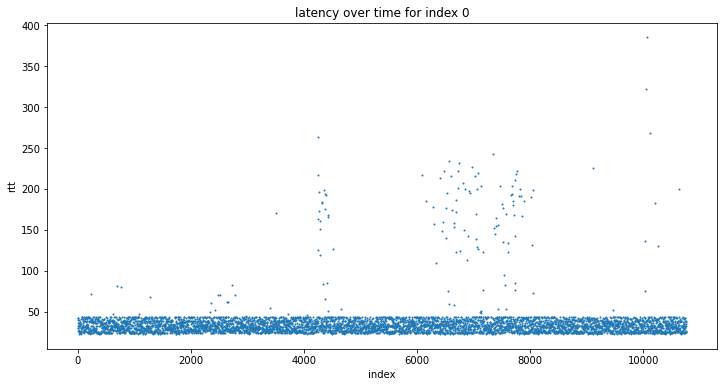

In [138]:
# load dataset from arise/MTL/data/<filename>
dataset_name = requests.get("http://localhost:5555/get_dataset").text
raw_data = pd.read_csv(f'arise/MTL/data/{dataset_name}', index_col=0)
raw_data['index'] = raw_data.index

# load predictions
preds = pd.read_json('preds.txt') 
preds['index'] = preds.index # create separate index column
figsize = (12,6)

# len(raw_data[raw_data['id'] == 2])
# len(preds) # 

for _index in range(1):
    _raw = get(raw_data, _index).iloc[::2].reset_index() # get only half as validation set, rather than full dataset
    # _raw['_category'] = _raw.apply(lambda x: 'loss' if x['loss'] == 1 else 'noise' if x['noise'] == 1 else 'congestion' if x['congestion'] == 1 else 'changepoint' if x['changepoint'] == 1 else 'normal')
    _raw['_category'] = 'normal'
    
    # _raw.where(_raw['loss'] == 1)['category'] = 'loss'
    # _raw.where(_raw['noise'] == 1)['category'] = 'noise'
    # _raw.where(_raw['congestion'] == 1)['category'] = 'congestion'
    # _raw.where(_raw['changepoint'] == 1)['category'] = 'changepoint'
    
    print(_raw)
    
    # _pred = preds[:len(_raw)]
    
    # for col in preds.columns:
    #     if col not in ['loss', 'noise', 'congestion', 'changepoint']: continue # only use tasks
        
    _raw.plot(x='index', y='rtt', kind='scatter', figsize=figsize, s=1, title=f"latency over time for index {_index}")
    
    # groups = _raw.groupby("_category")
    
    # plt.show()
    

# load one subset at a time using     df[df['id'] == index]
# for i in range(28):
#     _raw = raw_data[raw_data['id'] == i]
#     _pred = preds[preds['id']]
    
#     for col in df.columns:
#         if col not in ['loss', 'noise', 'congestion', 'changepoint']: continue
#         df.plot(x='index', y=col, kind='scatter', figsize=figsize, s=0.01, title=f"{col} over time")
#         plt.show()


# raw_data.plot(x='index', y='rtt', kind='scatter', figsize=figsize, s=0.01)
# plt.show()


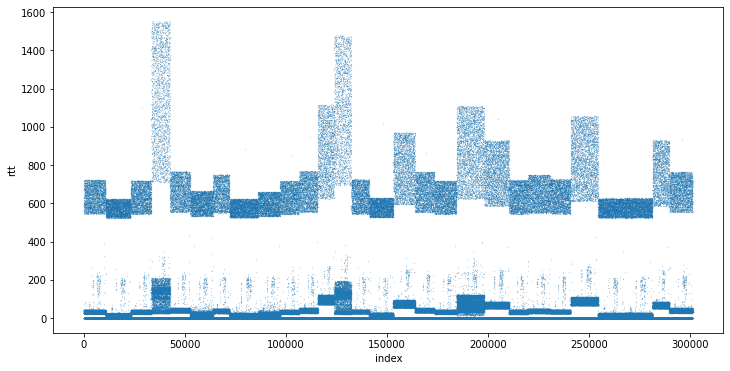